In [1]:
#  import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [5]:
# loading dataset
df=pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


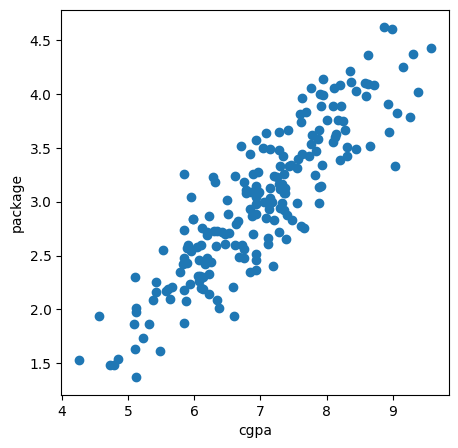

In [7]:
plt.figure(figsize=(5,5))
plt.scatter(df.cgpa,df.package)
plt.xlabel('cgpa')
plt.ylabel('package')
plt.show()

In [20]:
X=df.iloc[:,0:1]
y=df.iloc[:,-1]

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
x_train.shape

(160, 1)

In [25]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [28]:
x_test

,cgpa
95,6.63
15,7.25
30,7.36
158,5.95
128,7.93
115,8.35
69,7.30
170,6.22
174,7.32
45,7.87


In [29]:
y_test

95     2.79
15     3.23
30     3.26
158    3.04
128    3.34
115    4.21
69     2.94
170    2.87
174    2.99
45     3.58
66     1.63
182    2.08
165    4.08
78     2.21
186    3.47
177    3.64
56     2.74
152    3.08
82     2.17
68     2.99
124    2.31
16     2.35
148    3.40
93     3.08
65     3.81
60     2.19
84     1.53
67     2.89
125    3.16
132    2.48
9      3.51
18     2.98
55     3.39
75     3.28
150    2.73
104    3.74
135    2.60
137    3.13
164    3.82
76     3.15
Name: package, dtype: float64

In [40]:
model.predict(x_test.iloc[0].values.reshape(1,1))

C:\Users\BAPS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.78031348])

In [41]:
y_test.iloc[0]

2.79

In [ ]:
# as we can see that predicted value is 2.780 and actual value is 2.79

# Evaluation metrics

In [49]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

In [46]:
# how much of the variance in the target is explained by the model.
# R2 = 1 : perfect prediction
# R2 = 0 : model is as good as predicting mean
# R2 < 0 : worse than predicting mean (bad model)
    
print('r2_score of train',r2_score(y_train,y_pred_train))
print('r2_score of test',r2_score(y_test,y_pred_test))


r2_score of train 0.7758339025733345
r2_score of test 0.7730984312051673


In [48]:
# Penalizes larger errors more heavily because of the squaring.
# use wen we want to heavily penalize large deviations (useful when big errors are costly)
print('MSE of test',mean_squared_error(y_test,y_pred_test))

MSE of test 0.08417638361329656


In [50]:
# Average of absolute differences between predicted  and actual  values.
# use when we want an error metric that is robust to outliers (since it doesn’t square the error)

print('MAE of test',mean_absolute_error(y_test,y_pred_test))

MAE of test 0.23150985393278373


In [53]:
# Square root of MSE → brings error back to same unit as target variable.
# You want interpretability in the same scale as target (y).

print('RMSE of test',np.sqrt(mean_squared_error(y_test,y_pred_test)))

RMSE of test 0.2901316659954521
